introduce the idea of kernel methods and to implement a Gaussian radius basis function (RBF) kernel that is used to perform nonlinear dimensionality reduction via BF kernel principal component analysis (kPCA).

Principal Component Analysis

The main purpose of principal component analysis (PCA) is the analysis of data to identify patterns that represent the data “well.” The principal components can be understood as new axes of the dataset that maximize the variance along those axes (the eigenvectors of the covariance matrix). In other words, PCA aims to find the axes with maximum variances along which the data is most spread.

Nonlinear dimensionality reduction

The “classic” PCA approach described above is a linear projection technique that works well if the data is linearly separable. However, in the case of linearly inseparable data, a nonlinear technique is required if the task is to reduce the dimensionality of a dataset.

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.feature_extraction import PrincipalComponentAnalysis as PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from mlxtend.feature_extraction import RBFKernelPCA as KPCA
import seaborn as sns
sns.set(style='ticks')

# dataset

In [8]:
main_data = pd.read_excel("Indosat_v4.xls",index=False)
main_data.head()

,status,tenure,subscriber_type,area,handset_type,vol_of_usg,data_rev,voice_duration,invoice_amount,data_usage_in_mb,usage_in_a_month,apps_travel,apps_ecommerce,apps_finance,apps_socialnet,apps_transportation,apps_video,age_catg,gender
0,3,5,0,4,5,63704038012,29303.0,0,30000,0,400,0,0,0,0,0,0,50,1
1,2,0,0,4,5,30230593292,249076.0,0,40000,0,300,0,0,0,0,0,0,50,1
2,3,3,0,6,5,9812721395,50000.0,0,50000,376704,100,1,1,1,1,0,1,50,1
3,1,2,1,4,4,74995444756,146982.0,0,60000,0,100,0,0,0,0,0,0,70,0
4,3,3,0,5,5,23673284518,80000.0,0,70000,265588,100,1,1,1,1,0,1,20,0


In [75]:
#Gaussian Mixture Model
gmm = GaussianMixture(n_components=2,random_state=None)
gmm.fit(main_data)
label = pd.DataFrame(gmm.predict(main_data))
dd = [0,1]
n=0
label.iloc[:,n] = label.iloc[:,n].map(dict(zip(label.iloc[:,n].unique(),dd)))

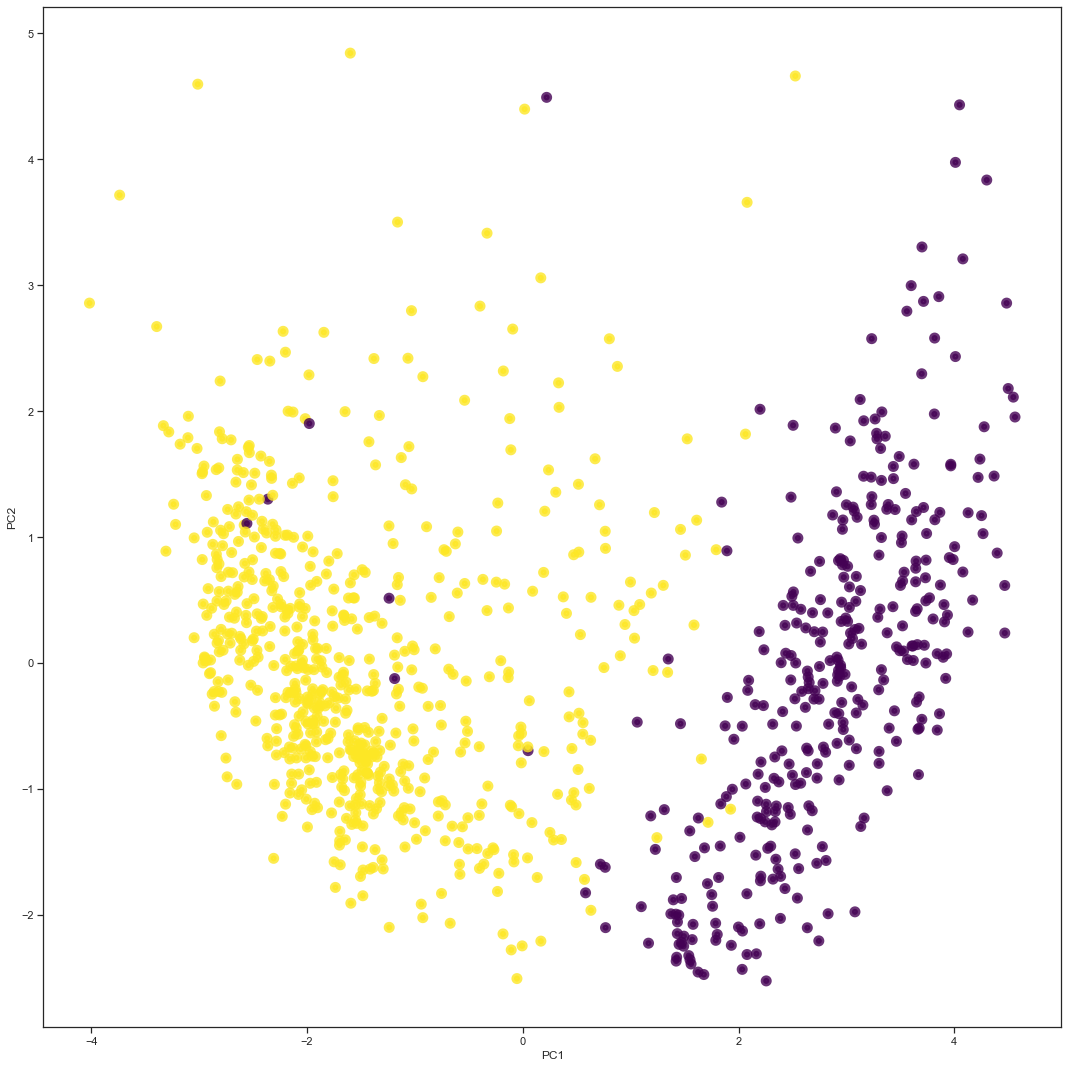

In [76]:
scaler = StandardScaler()
scaler.fit(main_data)
X_scaled = scaler.transform(main_data)

pca = PCA(n_components=2)
X_pca = pca.fit(X_scaled).transform(X_scaled)

fig, ax = plt.subplots( figsize=(15, 15))
ax.scatter(X_pca[:, 0], X_pca[:, 1],c=(label), 
                  alpha=.8, lw=5, cmap=plt.get_cmap('viridis'))

plt.xlabel('PC1')
plt.ylabel('PC2')
fig.tight_layout()
plt.show()

# perform dimensionality reduction via RBF kernel PCA 

The choice of γ depends on the dataset and can be obtained via hyperparameter tuning techniques like Grid Search.

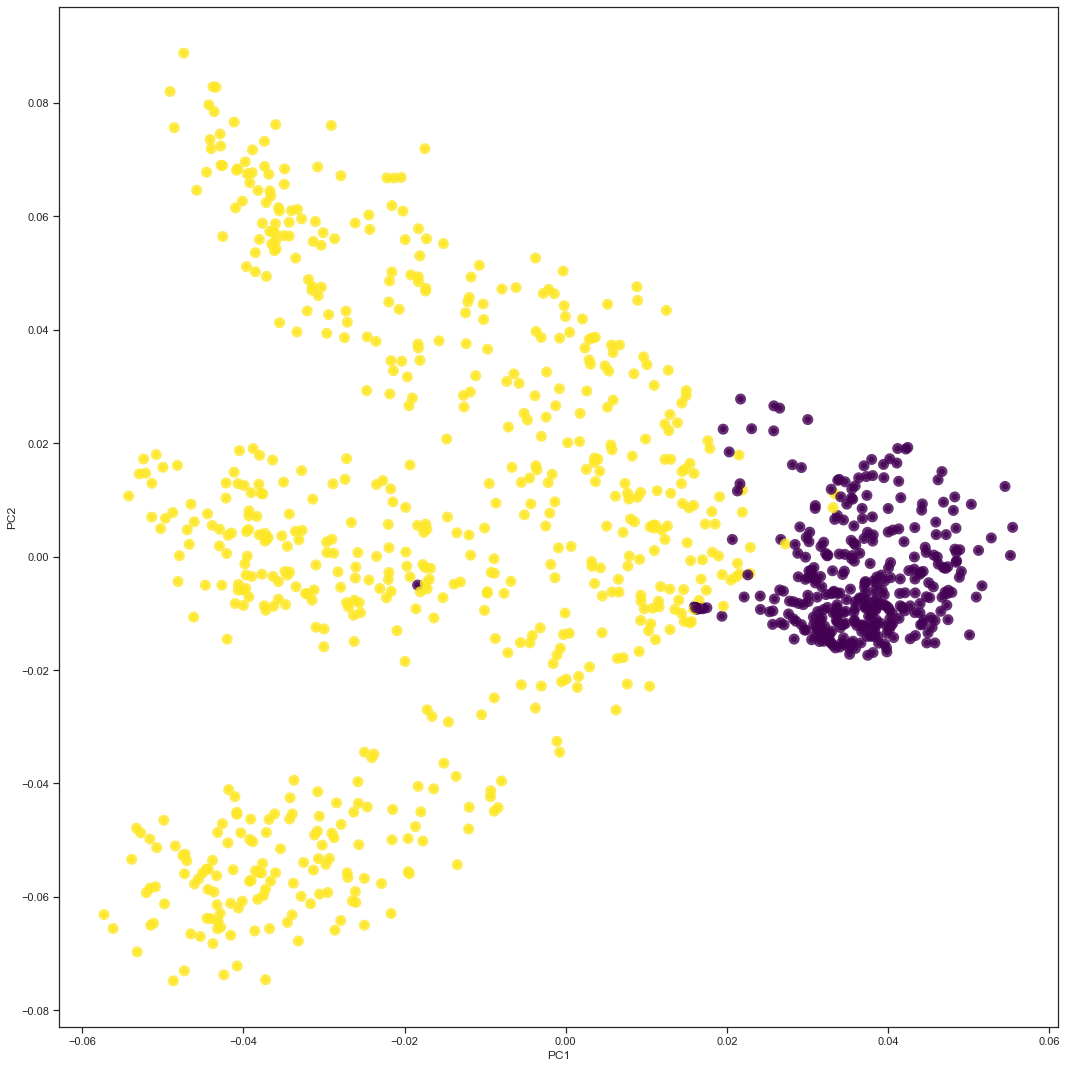

In [99]:
kpca = KPCA(gamma=0.1, n_components=2)
kpca.fit(X_scaled)
X_kpca = kpca.X_projected_

fig, ax = plt.subplots( figsize=(15, 15))
ax.scatter(X_kpca[:, 0], X_kpca[:, 1], c=(label),
                  alpha=.8, lw=5, cmap=plt.get_cmap('viridis'))

plt.xlabel('PC1')
plt.ylabel('PC2')
fig.tight_layout()
plt.show()